In [2]:
import numpy as np
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt

from time import time

from common import *
from generate import *
from filter_kruskal import *

In [2]:
common.run(args="--help")

Allowed options:
  -h [ --help ]                      produce help message
  -m [ --mst-kernel ] arg (=1)       Kernel used calculating MST. 0 = regular 
                                     kruskal, 1 = filter-kruskal
  -s [ --sort-kernel ] arg (=1)      Kernel used for sort() [int]
  -p [ --partition-kernel ] arg (=1) Kernel used for partition() [int]
  --pinned-memory                    use pinned memory (OFF by default)
  -f [ --filter-kernel ] arg (=0)    Kernel used for filter() [int]
  -c [ --compress-kernel ] arg (=1)  Kernel used for compress() [int]
  -r [ --recusion-depth ] arg (=32)  Kernel used for compress() [int]
  -n [ --repetitions ] arg (=1)      Number of times the MST calculation is 
                                     repeated [int]
  -i [ --inputfile ] arg             input file containing graph data. Filepath
                                     must be relative to Ex2/
  -t [ --ouputfile_timings ] arg     Output file for timings. Filepath must be 
             

In [7]:
args = f"--inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 1"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 1
159705 Edges loaded

Benchmark results:
Initialize	µ=0.162677s	sigma=0s	median=0.162677s	total=0.162677	num_calls=1
Kruskal()	µ=0.0832262s	sigma=0s	median=0.0832262s	total=0.0832262	num_calls=1
filter()	µ=0.00138493s	sigma=0.000757081s	median=0.000865106s	total=0.00415479	num_calls=3
grow MST	µ=0.00243157s	sigma=0s	median=0.00243157s	total=0.00243157	num_calls=1
partition()	µ=0.00172107s	sigma=5.67037e-05s	median=0.00184615s	total=0.00516322	num_calls=3
sort()	µ=0.0807894s	sigma=0s	median=0.0807894s	total=0.0807894	num_calls=1
total	µ=0.255249s	sigma=0s	median=0.255249s	total=0.255249	num_calls=1


,tag,average,std_dev,median,total,num_calls
0,Initialize,0.162677,0.000000,0.162677,0.162677,1
1,Kruskal(),0.083226,0.000000,0.083226,0.083226,1
2,filter(),0.001385,0.000757,0.000865,0.004155,3
3,grow MST,0.002432,0.000000,0.002432,0.002432,1
4,partition(),0.001721,0.000057,0.001846,0.005163,3
5,sort(),0.080789,0.000000,0.080789,0.080789,1
6,total,0.255249,0.000000,0.255249,0.255249,1


In [8]:
args = f"--inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 5"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 5
159705 Edges loaded

Benchmark results:
Initialize	µ=0.0355256s	sigma=0.030162s	median=0.00178234s	total=0.177628	num_calls=5
Kruskal()	µ=0.0562453s	sigma=0.0124907s	median=0.0074132s	total=0.281226	num_calls=5
filter()	µ=0.00257133s	sigma=0.000679371s	median=0.0066538s	total=0.0205706	num_calls=8
grow MST	µ=0.00245051s	sigma=0.00042055s	median=0.000639712s	total=0.0122526	num_calls=5
partition()	µ=0.00152555s	sigma=7.81982e-05s	median=0.001379s	total=0.0122044	num_calls=8
sort()	µ=0.0537914s	sigma=0.0121771s	median=0.00677074s	total=0.268957	num_calls=5
total	µ=0.098346s	sigma=0.0378661s	median=0.0172432s	total=0.49173	num_calls=5


,tag,average,std_dev,median,total,num_calls
0,Initialize,0.035526,0.030162,0.001782,0.177628,5
1,Kruskal(),0.056245,0.012491,0.007413,0.281226,5
2,filter(),0.002571,0.000679,0.006654,0.020571,8
3,grow MST,0.002451,0.000421,0.000640,0.012253,5
4,partition(),0.001526,0.000078,0.001379,0.012204,8
5,sort(),0.053791,0.012177,0.006771,0.268957,5
6,total,0.098346,0.037866,0.017243,0.491730,5


In [9]:
args = f"--inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 10"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 10
159705 Edges loaded

Benchmark results:
Initialize	µ=0.0180241s	sigma=0.0154066s	median=0.00176958s	total=0.180241	num_calls=10
Kruskal()	µ=0.0387229s	sigma=0.00889837s	median=0.0241446s	total=0.387229	num_calls=10
filter()	µ=0.00325988s	sigma=0.000494765s	median=0.00218286s	total=0.0488981	num_calls=15
grow MST	µ=0.00190343s	sigma=0.000317166s	median=0.00149953s	total=0.0190343	num_calls=10
partition()	µ=0.00140639s	sigma=3.28242e-05s	median=0.00118094s	total=0.0210958	num_calls=15
sort()	µ=0.0368162s	sigma=0.00862623s	median=0.0226421s	total=0.368162	num_calls=10
total	µ=0.0637644s	sigma=0.0211352s	median=0.0327853s	total=0.637644	num_calls=10


,tag,average,std_dev,median,total,num_calls
0,Initialize,0.018024,0.015407,0.001770,0.180241,10
1,Kruskal(),0.038723,0.008898,0.024145,0.387229,10
2,filter(),0.003260,0.000495,0.002183,0.048898,15
3,grow MST,0.001903,0.000317,0.001500,0.019034,10
4,partition(),0.001406,0.000033,0.001181,0.021096,15
5,sort(),0.036816,0.008626,0.022642,0.368162,10
6,total,0.063764,0.021135,0.032785,0.637644,10


In [10]:
# this will fail after 1.5 mins => let the largest graph only run 3 times
args = f"--inputfile benchmark_data/barabasi_12800_50pct.csv --mst-kernel 1 -s 1 -n 10"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_12800_50pct.csv --mst-kernel 1 -s 1 -n 10
40966875 Edges loaded
terminate called after throwing an instance of 'std::bad_array_new_length'
  what():  std::bad_array_new_length


CalledProcessError: Command '['/home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2', '--ouputfile_timings', '/home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv', '--inputfile', 'benchmark_data/barabasi_12800_50pct.csv', '--mst-kernel', '1', '-s', '1', '-n', '10']' died with <Signals.SIGABRT: 6>.

In [3]:
def out_file_name(single_run):
    return single_run['prefix'] + "_" + str(single_run['n_nodes']) + "_" + str(single_run['density']) + ".csv"

def do_benchmark_runs(list_of_runs):
    for single_run in list_of_runs:
        args = f"--inputfile benchmark_data/barabasi_{single_run['n_nodes']}_{single_run['density']}.csv {single_run['flags']}"
        out_file = out_file_name(single_run)
        common.run_benchmark(common.OUT_DIR / out_file, args=args, print_output=False)


In [4]:
whatever_runs = [{'n_nodes': 200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 3200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 6400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 200, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'}
                ]

n_nodes_list_d10 = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
n_nodes_list_d50 = [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
n_nodes_list_d90 = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400]

filter_kruskal_runs_d50 = []
for n_nodes in n_nodes_list_d50[:-1]:
    filter_kruskal_runs_d50.append({'n_nodes': n_nodes, 'density': '50pct', 'prefix':'filter_kruskal', 'flags':'-n 10'})
# only 3 repetitions on the biggest graph
filter_kruskal_runs_d50.append({'n_nodes': n_nodes_list_d50[-1], 'density': '50pct', 'prefix':'filter_kruskal', 'flags':'-n 3'})

regular_kruskal_runs_d50 = []
for n_nodes in n_nodes_list_d50[:-1]:
    regular_kruskal_runs_d50.append({'n_nodes': n_nodes, 'density': '50pct', 'prefix':'regular_kruskal', 'flags':'-m 0 -n 10'})
# only 3 repetitions on the biggest graph
regular_kruskal_runs_d50.append({'n_nodes': n_nodes_list_d50[-1], 'density': '50pct', 'prefix':'regular_kruskal', 'flags':'-m 0 -n 3'})



In [5]:
# collect data for stacked bars
def collect_for_stack(list_of_runs, stack_items=['Initialize', 'filter()', 'grow MST', 'sort()', 'partition()']):
    labels = []
    results = {}
    for si in stack_items:
        results[si] = []

    for single_run in list_of_runs:
        labels.append(single_run['n_nodes'])
        file_name = out_file_name(single_run)
        df = pd.read_csv(common.OUT_DIR / file_name, sep=';')
        df.set_index('tag',inplace=True)
        for si in stack_items:
            results[si].append(df.loc[si]['total'])
    return labels, results

# collect run times for plotting
def collect_run_times(list_of_runs):
    results = {}
    row_labels = []

    for single_run in list_of_runs:
        file_name = out_file_name(single_run)
        df = pd.read_csv(common.OUT_DIR / file_name, sep=';')
        df.set_index('tag',inplace=True)
        run_time = df.loc['total']['median']
        row_label = single_run['prefix'] + "_" + single_run['density']
        if not(row_label in row_labels):
            row_labels.append(row_label)
            results[row_label+"_x"] = []
            results[row_label+"_y"] = []
        results[row_label+"_x"].append(single_run['n_nodes'])
        results[row_label+"_y"].append(run_time)
    return row_labels, results


In [6]:
def plot_stacked_lines(labels, results):
    for key in results:
        plt.bar(labels, results[key])
    plt.legend()
    plt.grid()
    plt.xlabel('number of nodes')
    plt.ylabel('execution time in s')



def plot_lines(row_labels, results):
    for row_label in row_labels:
        plt.loglog(results[row_label+'_x'], results[row_label+'_y'], label=row_label, marker='o')
    plt.legend()
    plt.grid()
    plt.xlabel('number of nodes')
    plt.ylabel('execution time in s')

In [40]:
do_benchmark_runs(filter_kruskal_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_400_50pct.csv --inputfile benchmark_data/barabasi_400_50pct.csv -n 10
Running benchmark with ./home/

In [42]:
do_benchmark_runs(regular_kruskal_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 0 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 0 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 0 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_400_50pct.csv --inputfile benchmark_data/barabasi_400_50pct.csv -m 0 -n 10
Runnin

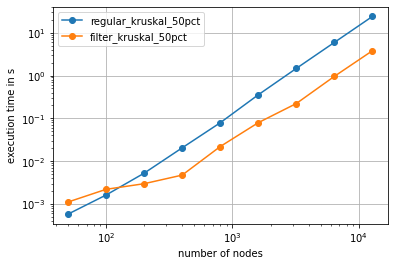

In [7]:
labels, results = collect_run_times(regular_kruskal_runs_d50 + filter_kruskal_runs_d50)
plot_lines(labels, results)

In [11]:
labels, stack = collect_for_stack(filter_kruskal_runs_d50)
print(labels)
stack

[50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]


{'Initialize': [0.203487,
  0.176199,
  0.159147,
  0.16438,
  0.174999,
  0.228297,
  0.493083,
  1.57406,
  1.81156],
 'filter()': [0.000633956,
  0.00191302,
  0.00593438,
  0.0194555,
  0.0745448,
  0.311842,
  1.14562,
  4.67318,
  5.59636],
 'grow MST': [0.00011854,
  0.000235208,
  0.000499641,
  0.00118221,
  0.00322678,
  0.00783342,
  0.0275189,
  0.0778322,
  0.10756],
 'sort()': [0.00338958,
  0.00527879,
  0.00649566,
  0.00908933,
  0.0242805,
  0.0795909,
  0.450241,
  1.08136,
  1.8839],
 'partition()': [0.00995878,
  0.0149713,
  0.014379,
  0.0193818,
  0.0781556,
  0.24422,
  0.675617,
  2.11057,
  3.45718]}

In [9]:
def stack_percent(stack, top_at_100=True):
    top = 1
    if top_at_100:
        top = 100

    stack_pct = {}
    totals = []
    keys = list(stack.keys())
    resolutions = len(stack[keys[0]])

    for i in range(resolutions):
        total = 0
        for key in stack:
            total += stack[key][i]
        totals.append(total)
    
    for key in keys:
        stack_pct[key] = [stack[key][i] / totals[i] * top for i in range(resolutions)]
        
    return stack_pct, totals


dict_keys(['Initialize', 'filter()', 'grow MST', 'sort()', 'partition()'])

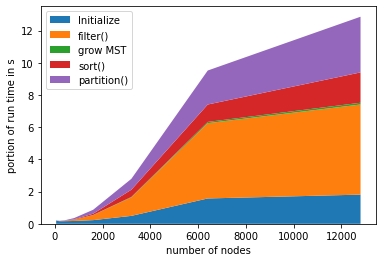

In [10]:
plt.stackplot(labels,stack['Initialize'],stack['filter()'], stack['grow MST'], stack['sort()'], stack['partition()'], labels=stack.keys())
plt.legend(loc='upper left')
plt.xlabel('number of nodes')
plt.ylabel('portion of run time in s')
stack.keys()

Text(0, 0.5, 'run time')

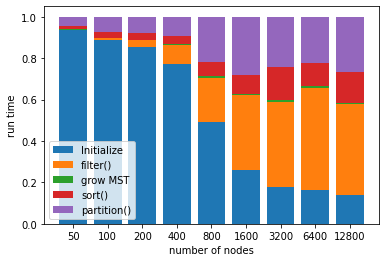

In [12]:
str_labels = []
for label in labels:
    str_labels.append(str(label))
key_list = list(stack.keys())
stack_pct, totals = stack_percent(stack, top_at_100=False)
#print(totals)
bottom = np.zeros(len(labels))
for i in range(len(key_list)):
    #plt.bar(str_labels, stack_pct[key_list[i]], bottom=stack_pct[key_list[i-1]], label=key_list[i])
    plt.bar(str_labels, stack_pct[key_list[i]], bottom=bottom, label=key_list[i])
    bottom += np.array(stack_pct[key_list[i]])

plt.legend()
plt.xlabel('number of nodes')
plt.ylabel('run time')
